## Тест

In [1]:
# import osmnx as ox
import pandas as pd
import geopandas as gpd
import networkx as nx
import numpy as np
import warnings
import sys
import os
warnings.filterwarnings("ignore")
sys.stderr = open(os.devnull, 'w')

# local crs
local_crs = 32636


from popframe.models.region import Region

region_model = Region.from_pickle('data/Ленинградская область.pickle')
grid = gpd.read_file('data/grid.geojson', engine="pyogrio")
grid

,geometry
0,"POLYGON ((29.65352 60.75606, 29.69198 60.73276..."
1,"POLYGON ((34.21298 59.70612, 34.24864 59.6808,..."
2,"POLYGON ((30.54114 59.98839, 30.57846 59.96455..."
3,"POLYGON ((34.68571 60.95192, 34.72244 60.92676..."
4,"POLYGON ((34.5092 59.59026, 34.54462 59.5648, ..."
...,...
2143,"POLYGON ((28.90861 60.56897, 28.9471 60.54592,..."
2144,"POLYGON ((32.84355 59.76933, 32.87981 59.74454..."
2145,"POLYGON ((32.53064 59.24881, 32.5665 59.22401,..."
2146,"POLYGON ((30.05365 60.38205, 30.09156 60.3585,..."


In [2]:
from popframe.method.territory_evaluation import TerritoryEvaluation

evaluation = TerritoryEvaluation(region=region_model)

results = evaluation.population_criterion(territories_gdf=grid)
scores_df = pd.DataFrame(results)
scores_df

,project,average_population_density,total_population,score,interpretation
0,None,1.0,2161,2.0,Территория имеет умеренные показатели численно...
1,None,0.1,313,1.0,Территория имеет малые показатели численности ...
2,None,139.9,307578,5.0,Территория с высокими показателями численности...
3,None,0.0,15,1.0,Территория имеет малые показатели численности ...
4,None,1.9,4221,2.0,Территория имеет умеренные показатели численно...
...,...,...,...,...,...
2143,None,2.4,5328,3.0,Территория имеет показатели численности и плот...
2144,None,0.1,120,1.0,Территория имеет малые показатели численности ...
2145,None,1.9,4232,2.0,Территория имеет умеренные показатели численно...
2146,None,9.4,20684,3.0,Территория имеет показатели численности и плот...


In [3]:
grid['score'] = scores_df['score']
grid

,geometry,score
0,"POLYGON ((29.65352 60.75606, 29.69198 60.73276...",2.0
1,"POLYGON ((34.21298 59.70612, 34.24864 59.6808,...",1.0
2,"POLYGON ((30.54114 59.98839, 30.57846 59.96455...",5.0
3,"POLYGON ((34.68571 60.95192, 34.72244 60.92676...",1.0
4,"POLYGON ((34.5092 59.59026, 34.54462 59.5648, ...",2.0
...,...,...
2143,"POLYGON ((28.90861 60.56897, 28.9471 60.54592,...",3.0
2144,"POLYGON ((32.84355 59.76933, 32.87981 59.74454...",1.0
2145,"POLYGON ((32.53064 59.24881, 32.5665 59.22401,...",2.0
2146,"POLYGON ((30.05365 60.38205, 30.09156 60.3585,...",3.0


In [4]:
# grid.to_file("grid_population_score.geojson", driver="GeoJSON")

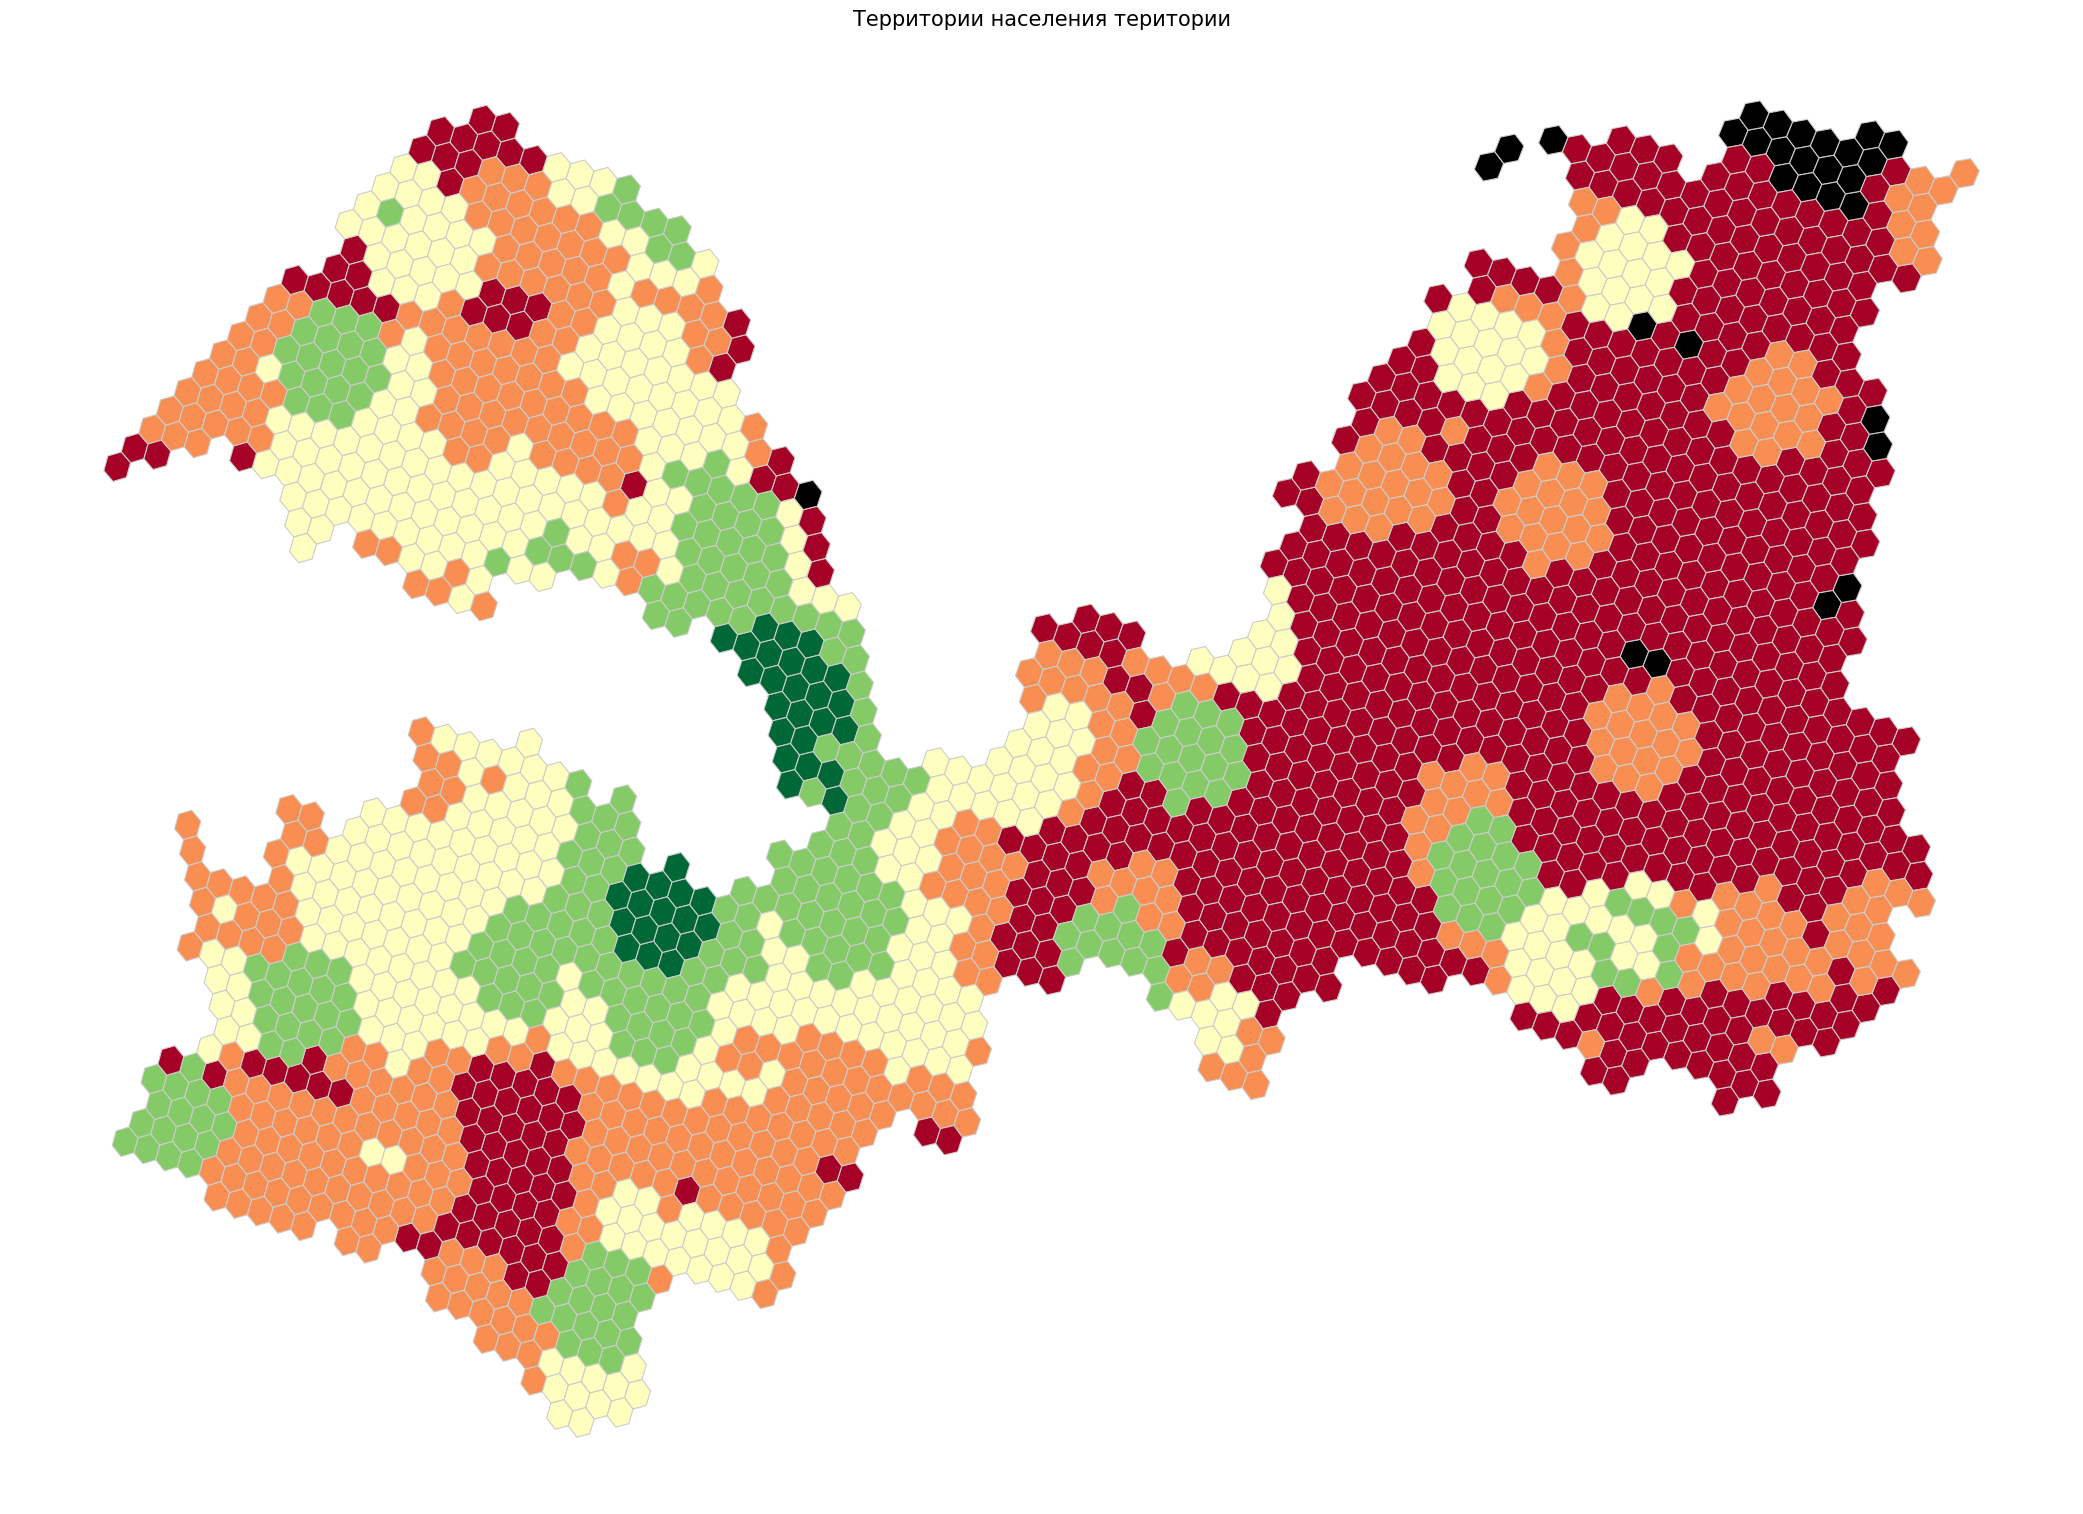

In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np

# Предположим, что у вас есть GeoDataFrame с колонкой 'score'
# gdf содержит геометрию и колонку с оценками ('score')

# Определяем цветовую карту: от красного (низкий score) к зелёному (высокий score)
cmap = cm.get_cmap('RdYlGn')

# Определяем нормализацию значений для цветовой карты, начиная с 1
norm = colors.Normalize(vmin=1, vmax=grid['score'].max())

# Создаём карту
fig, ax = plt.subplots(1, 1, figsize=(30, 15))  # Увеличиваем размер карты

# Функция для задания цвета
def get_color(score):
    if score == 0:
        return 'black'  # Окрашиваем в черный если score равен 0
    else:
        return cmap(norm(score))  # Используем цветовую карту для оценок от 1 и выше

# Применяем цвета к каждой области
grid['color'] = grid['score'].apply(get_color)

# Визуализируем с раскраской по значению 'color'
grid.plot(color=grid['color'], linewidth=0.8, ax=ax, edgecolor='0.8')

# Отключаем оси
ax.set_axis_off()

# Настраиваем автоматическое управление компоновкой
plt.tight_layout()

# Добавляем заголовок
ax.set_title('Территории населения територии', fontsize=15)

# Показать карту
plt.show()



In [6]:
from popframe.method.territory_evaluation import TerritoryEvaluation

evaluation = TerritoryEvaluation(region=region_model)

results = evaluation.evaluate_territory_location(territories_gdf=grid)
scores_df = pd.DataFrame(results)
scores_df

,territory,score,interpretation,closest_settlement,closest_settlement1,closest_settlement2
0,None,1.5,Территория находится внутри или непосредственн...,Ромашки,None,None
1,None,0.5,Территория находится внутри или непосредственн...,Казённое Село,None,None
2,None,3.0,Территория находится внутри или непосредственн...,Всеволожск,None,None
3,None,0.5,Территория находится внутри или непосредственн...,Пидьма,None,None
4,None,0.5,Территория находится внутри или непосредственн...,Рязанский Шлюз,None,None
...,...,...,...,...,...,...
2143,None,1.5,Территория находится внутри или непосредственн...,Гаврилово,None,None
2144,None,0.5,Территория находится внутри или непосредственн...,Зеленец (поселок),None,None
2145,None,0.5,Территория находится внутри или непосредственн...,Бестоголово,None,None
2146,None,2.5,Территория находится внутри или непосредственн...,Лемболово (поселок при ж/д),None,None


In [7]:
sorted_blocks = scores_df.sort_values(by=['score'], ascending=False)
sorted_blocks

,territory,score,interpretation,closest_settlement,closest_settlement1,closest_settlement2
416,None,3.0,Территория находится внутри или непосредственн...,Мурино,None,None
241,None,3.0,Территория находится внутри или непосредственн...,Кириши,None,None
569,None,3.0,Территория находится внутри или непосредственн...,Тихвин,None,None
522,None,3.0,Территория находится внутри или непосредственн...,Кириши,None,None
362,None,3.0,Территория находится внутри или непосредственн...,Тихвин,None,None
...,...,...,...,...,...,...
528,None,0.0,Территория находится за границей агломерации,None,None,None
169,None,0.0,Территория находится за границей агломерации,None,None,None
2032,None,0.0,Территория находится за границей агломерации,None,None,None
1976,None,0.0,Территория находится за границей агломерации,None,None,None


In [8]:
grid['score_2'] = scores_df['score']
grid

,geometry,score,color,score_2
0,"POLYGON ((29.65352 60.75606, 29.69198 60.73276...",2.0,"(0.9748558246828143, 0.5574009996155325, 0.322...",1.5
1,"POLYGON ((34.21298 59.70612, 34.24864 59.6808,...",1.0,"(0.6470588235294118, 0.0, 0.14901960784313725,...",0.5
2,"POLYGON ((30.54114 59.98839, 30.57846 59.96455...",5.0,"(0.0, 0.40784313725490196, 0.21568627450980393...",3.0
3,"POLYGON ((34.68571 60.95192, 34.72244 60.92676...",1.0,"(0.6470588235294118, 0.0, 0.14901960784313725,...",0.5
4,"POLYGON ((34.5092 59.59026, 34.54462 59.5648, ...",2.0,"(0.9748558246828143, 0.5574009996155325, 0.322...",0.5
...,...,...,...,...
2143,"POLYGON ((28.90861 60.56897, 28.9471 60.54592,...",3.0,"(0.9970780469050365, 0.9987697039600154, 0.745...",1.5
2144,"POLYGON ((32.84355 59.76933, 32.87981 59.74454...",1.0,"(0.6470588235294118, 0.0, 0.14901960784313725,...",0.5
2145,"POLYGON ((32.53064 59.24881, 32.5665 59.22401,...",2.0,"(0.9748558246828143, 0.5574009996155325, 0.322...",0.5
2146,"POLYGON ((30.05365 60.38205, 30.09156 60.3585,...",3.0,"(0.9970780469050365, 0.9987697039600154, 0.745...",2.5


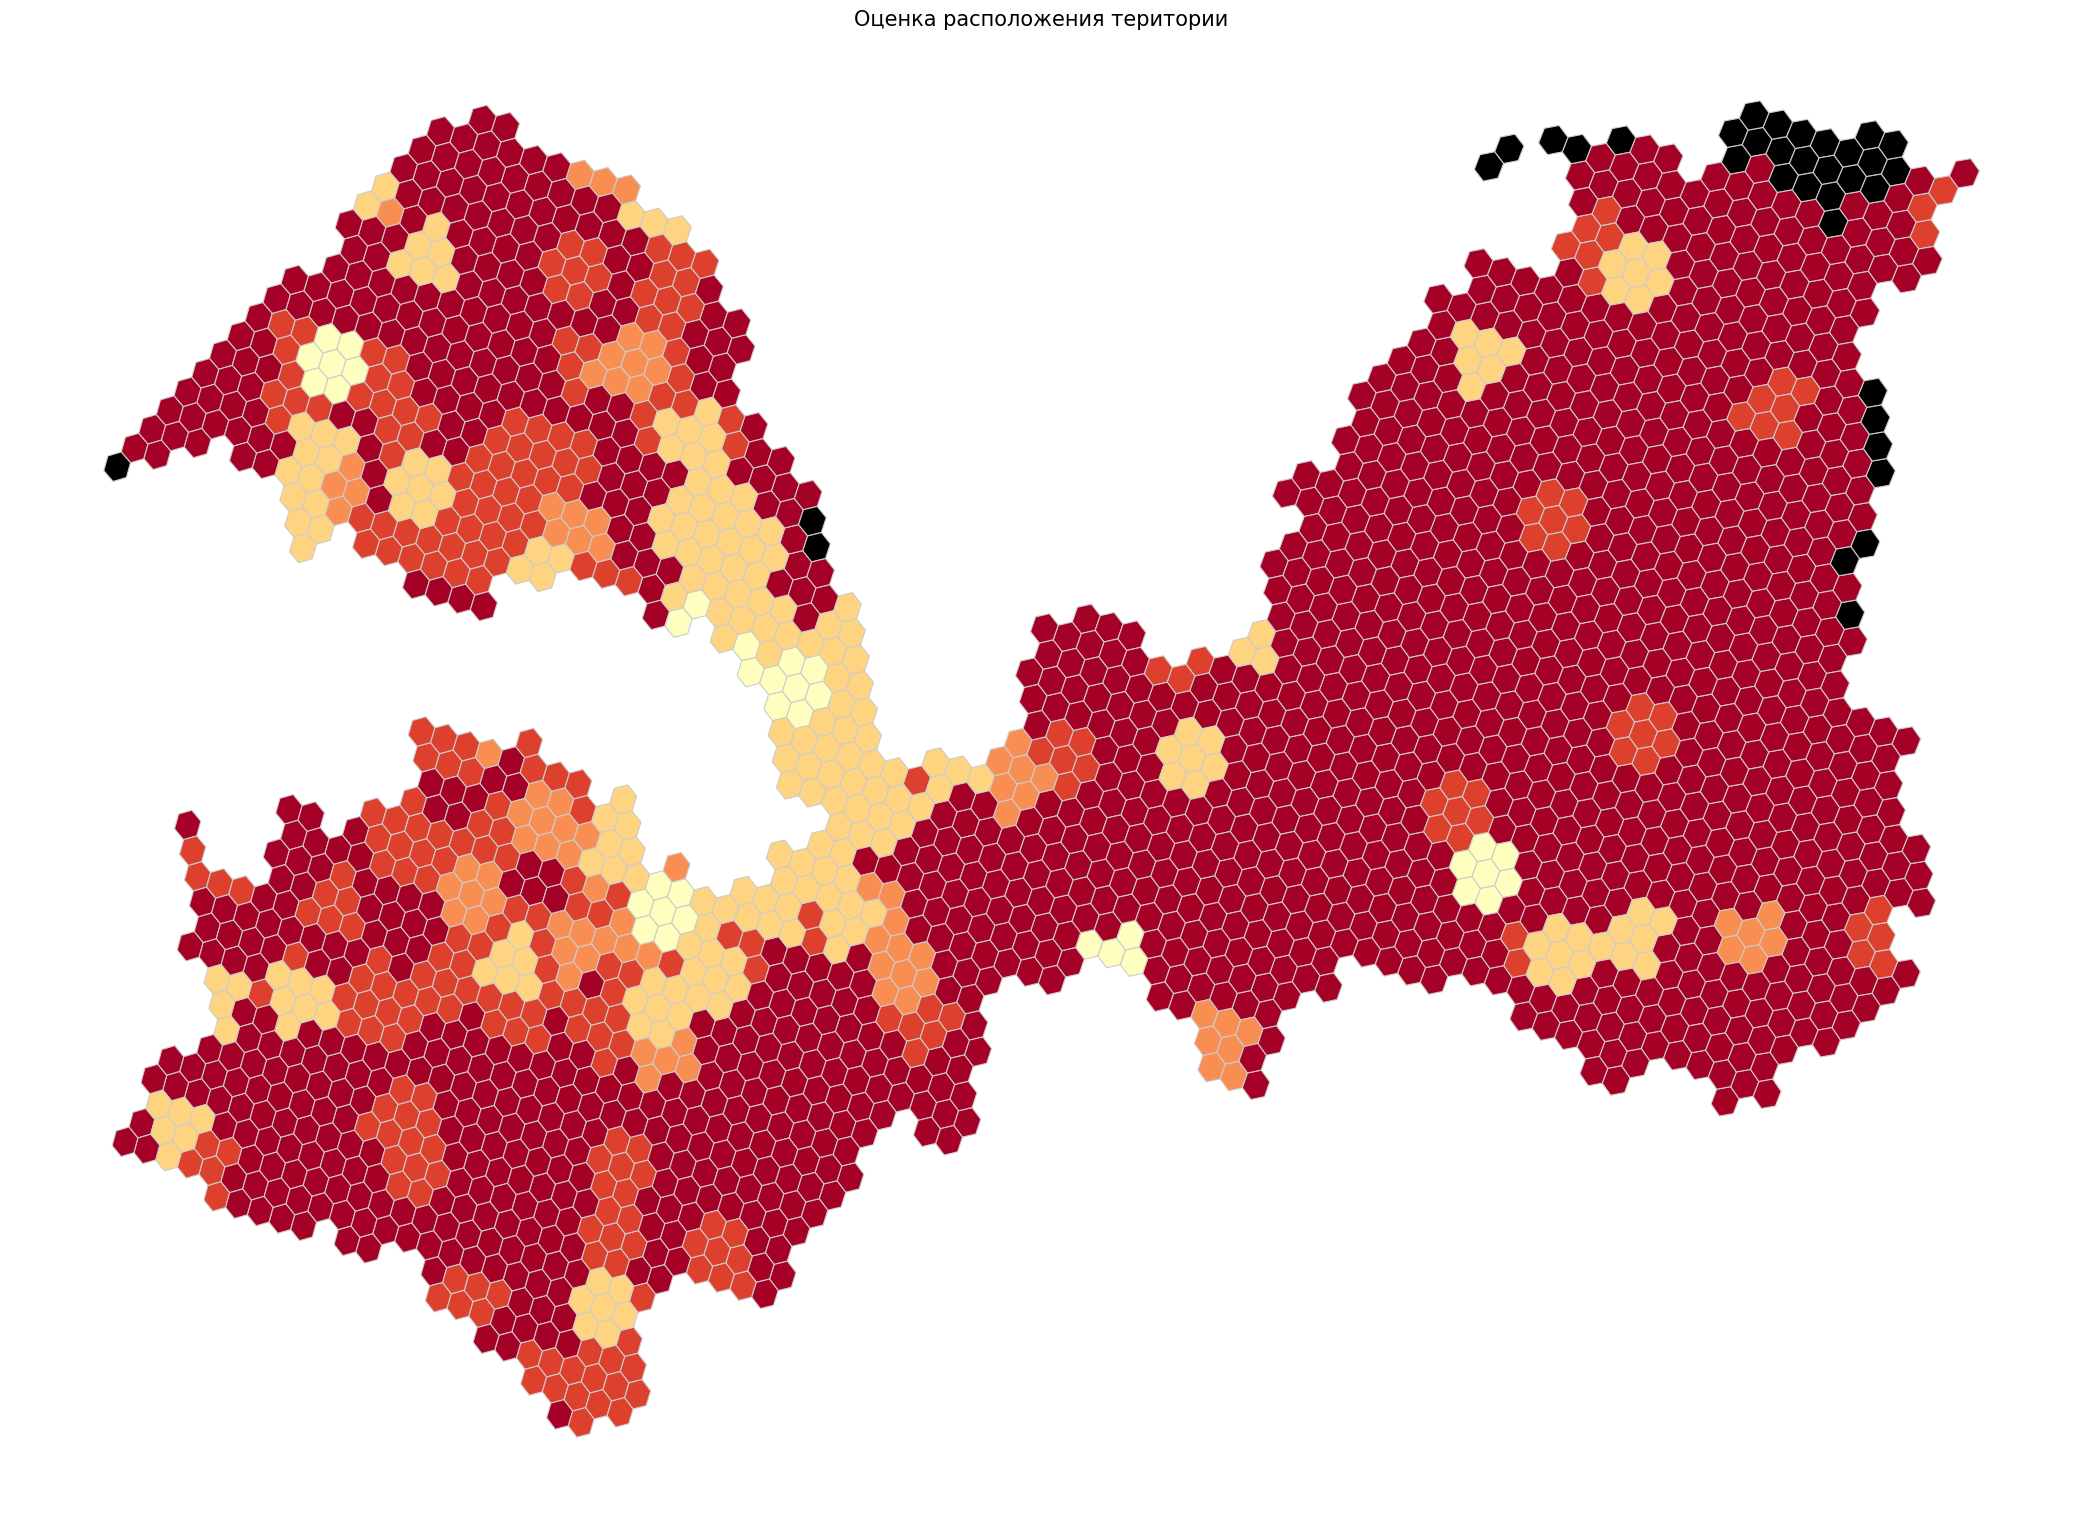

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np

# Предположим, что у вас есть GeoDataFrame с колонкой 'score'
# gdf содержит геометрию и колонку с оценками ('score')

# Определяем цветовую карту: от красного (низкий score) к зелёному (высокий score)
cmap = cm.get_cmap('RdYlGn')

# Определяем нормализацию значений для цветовой карты, начиная с 1
norm = colors.Normalize(vmin=1, vmax=grid['score'].max())

# Создаём карту
fig, ax = plt.subplots(1, 1, figsize=(30, 15))  # Увеличиваем размер карты

# Функция для задания цвета
def get_color(score):
    if score == 0:
        return 'black'  # Окрашиваем в черный если score равен 0
    else:
        return cmap(norm(score))  # Используем цветовую карту для оценок от 1 и выше

# Применяем цвета к каждой области
grid['color'] = grid['score_2'].apply(get_color)

# Визуализируем с раскраской по значению 'color'
grid.plot(color=grid['color'], linewidth=0.8, ax=ax, edgecolor='0.8')

# Отключаем оси
ax.set_axis_off()

# Настраиваем автоматическое управление компоновкой
plt.tight_layout()

# Добавляем заголовок
ax.set_title('Оценка расположения територии', fontsize=15)

# Показать карту
plt.show()
